# HIV Testing Intervention

Tests and code for the creation of a new HIV testing intervention. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import stisim as ss

STIsim 0.0.8 (2023-10-04) — © 2023 by IDM


## Runing an basic simulation

In [2]:
# Network
ppl = ss.People( 10_000 )
ppl.networks = ss.ndict( ss.simple_sexual(), ss.maternal() )


# HIV settings and interventions
hiv_params = { 'beta'      : { 'simple_sexual': [ 0.0008, 0.0004], 
                               'maternal'     : [ 0.2   , 0     ]
                              },
               'initial' : 50   # Is this working with init_states?
              }
hiv = ss.HIV( pars=hiv_params )

hiv_simple_diagnostic = ss.hiv.SimpleDiagnosticTest( start=1995 )


# Simulation parameters
sim_params = { 'start': 1985,
               'end'  : 2050
              }


# Create and run simulation
sim = ss.Sim( pars          = sim_params,
              people        = ppl, 
              demographics  = [ ss.Pregnancy() ],   # Isn't people also demographics?
              diseases      = [ hiv, ss.Gonorrhea() ],
              interventions = [ hiv_simple_diagnostic ]
             )
sim.initialize()
sim.run()

Initializing sim (warning: not resetting sim.people) with 10000 agents
  Running 1985.0 ( 0/66) (0.00 s)  ———————————————————— 2%
  Running 1995.0 (10/66) (2.11 s)  •••————————————————— 17%
  Running 2005.0 (20/66) (2.27 s)  ••••••—————————————— 32%
  Running 2015.0 (30/66) (2.48 s)  •••••••••——————————— 47%
  Running 2025.0 (40/66) (2.73 s)  ••••••••••••———————— 62%
  Running 2035.0 (50/66) (3.01 s)  •••••••••••••••————— 77%
  Running 2045.0 (60/66) (3.29 s)  ••••••••••••••••••—— 92%


[<class 'stisim.sim.Sim'>, <class 'sciris.sc_utils.prettyobj'>, <class 'object'>]
————————————————————————————————————————————————————————————
Methods:
  finalize()          init_people()       shrink()            
  init_analyzers()    init_time_vecs()    step()              
  init_demographi...  initialize()        validate_dt()       
  init_diseases()     load()              validate_pars()     
  init_interventi...  run()               validate_post_i...  
  init_networks()     save()              
————————————————————————————————————————————————————————————
Properties:
  dt                  year                
————————————————————————————————————————————————————————————
    analyzers: objdict()
     complete: True
   connectors: None
      created: None
 demographics: #0. 'pregnancy':
               [ [...]
     diseases: #0. 'hiv':
               [<class 'stisim.hiv.HI [...]
     filename: None
  initialized: True
interventions: #0. 'simplediagnostictest':
               <stis

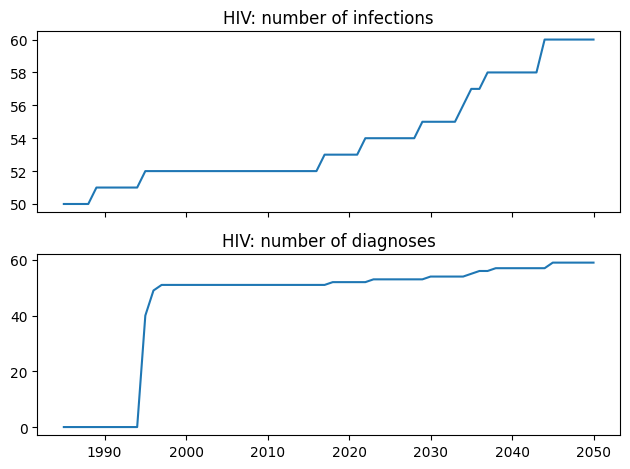

In [3]:
fig, axs = plt.subplots( 2, 1, sharex=True )

axs[0].plot( sim.yearvec, sim.results.hiv.n_infected )
axs[0].set_title( 'HIV: number of infections' )

axs[1].plot( sim.yearvec, sim.results.hiv.n_diagnosed )
axs[1].set_title( 'HIV: number of diagnoses' )

fig.tight_layout()

## Testing intervention using different parameters

In [4]:
testing_params = pd.DataFrame( [ [ 'low-coverage/low-sensitivity'  , 2000, 2040, 0.5, 0.50, 500 ],
                                 [ 'low-coverage/high-sensitivity' , 2000, 2040, 0.5, 0.99, 500 ],
                                 [ 'high-coverage/low-sensitivity' , 2000, 2040, 0.9, 0.50, 500 ],
                                 [ 'high-coverage/high-sensitivity', 2000, 2040, 0.9, 0.99, 500 ] ],
                               columns = ['label', 'start', 'end', 'coverage', 'sensitivity', 'cd4_threshold' ]
                              )                                                   

In [5]:
results = {}
results['infections'] = pd.DataFrame()
results['n_diagnosed'] = pd.DataFrame()
results['new_diagnoses'] = pd.DataFrame()


for index, row in testing_params.iterrows():

    print( '... running scenario: ', row['label'] )
    
    #Configure scenario
    this_ppl = ss.People( 10_000 )
    this_ppl.networks = ss.ndict( ss.simple_sexual(), ss.maternal() )
    hiv_scenario = ss.HIV( pars=hiv_params )
    hiv_diagnostic = ss.hiv.SimpleDiagnosticTest( **row.drop('label').to_dict() )
    sim_params = { 'start': 1985, 'end'  : 2050 }

    # Run scenario
    this_sim = ss.Sim( pars          = sim_params,
                       people        = this_ppl, 
                       demographics  = [ ss.Pregnancy() ],   # Isn't people also demographics?
                       diseases      = [ hiv_scenario, ss.Gonorrhea() ],
                       interventions = [ hiv_diagnostic ]
                      )
    this_sim.initialize()
    this_sim.run()
    
    results['infections']['t'] = this_sim.yearvec
    results['infections'][row['label']] = this_sim.results.hiv.n_infected

    results['n_diagnosed']['t'] = this_sim.yearvec
    results['n_diagnosed'][row['label']] = this_sim.results.hiv.n_diagnosed
    
    results['new_diagnoses']['t'] = this_sim.yearvec
    results['new_diagnoses'][row['label']] = this_sim.results.hiv.new_diagnoses

... running scenario:  low-coverage/low-sensitivity
Initializing sim (warning: not resetting sim.people) with 10000 agents
  Running 1985.0 ( 0/66) (0.00 s)  ———————————————————— 2%
  Running 1995.0 (10/66) (0.18 s)  •••————————————————— 17%
  Running 2005.0 (20/66) (0.40 s)  ••••••—————————————— 32%
  Running 2015.0 (30/66) (0.60 s)  •••••••••——————————— 47%
  Running 2025.0 (40/66) (0.84 s)  ••••••••••••———————— 62%
  Running 2035.0 (50/66) (1.11 s)  •••••••••••••••————— 77%
  Running 2045.0 (60/66) (1.40 s)  ••••••••••••••••••—— 92%
... running scenario:  low-coverage/high-sensitivity
Initializing sim (warning: not resetting sim.people) with 10000 agents
  Running 1985.0 ( 0/66) (0.00 s)  ———————————————————— 2%
  Running 1995.0 (10/66) (0.15 s)  •••————————————————— 17%
  Running 2005.0 (20/66) (0.33 s)  ••••••—————————————— 32%
  Running 2015.0 (30/66) (0.51 s)  •••••••••——————————— 47%
  Running 2025.0 (40/66) (0.74 s)  ••••••••••••———————— 62%
  Running 2035.0 (50/66) (0.98 s)  

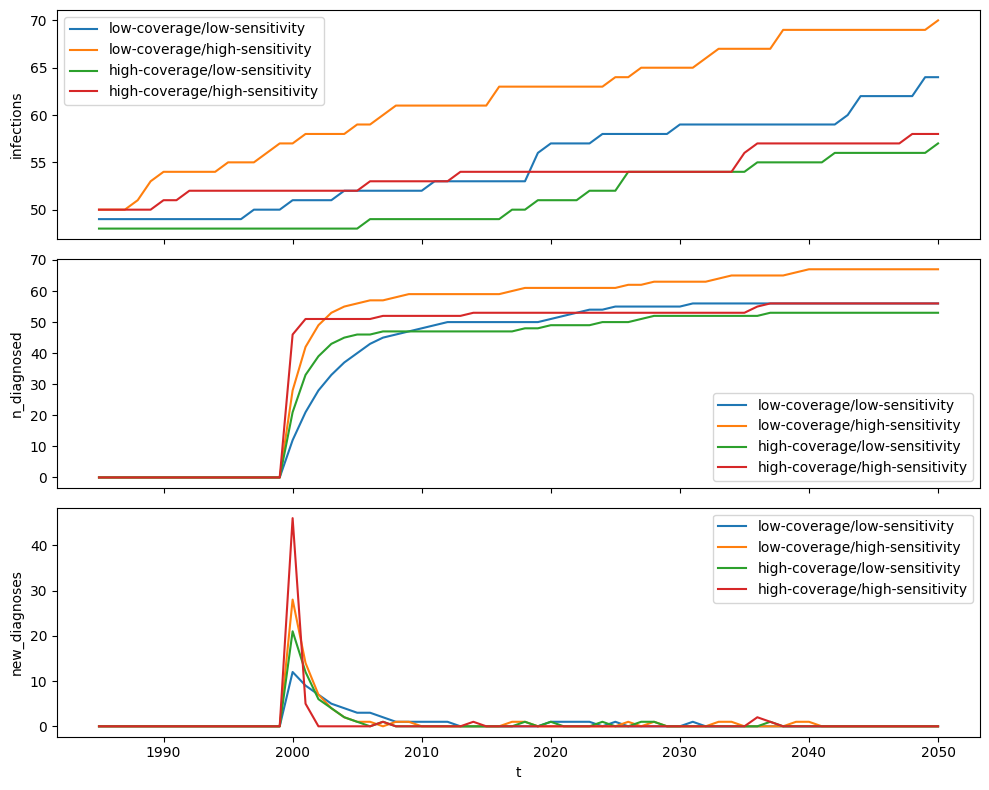

In [6]:
fig_scenarios, axs_scenarios = plt.subplots( 3, 1, figsize=(10,8),sharex=True )

results['infections'   ].plot( x='t', ylabel='infections'   , ax=axs_scenarios[0] )
results['n_diagnosed'  ].plot( x='t', ylabel='n_diagnosed'  , ax=axs_scenarios[1] )
results['new_diagnoses'].plot( x='t', ylabel='new_diagnoses', ax=axs_scenarios[2] )

fig_scenarios.tight_layout()